In [17]:
import pandas as pd
import numpy as np
df_classification = pd.read_csv('Dataset UTS_Gasal 2425.csv')
print(df_classification)

      squaremeters  numberofrooms hasyard haspool  floors  citycode  \
0            75523              3      no     yes      63      9373   
1            55712             58      no     yes      19     34457   
2            86929            100     yes      no      11     98155   
3            51522              3      no      no      61      9047   
4            96470             74     yes      no      21     92029   
...            ...            ...     ...     ...     ...       ...   
9995           341             83      no      no       8      1960   
9996         21514              5      no     yes      11     91373   
9997          1726             89      no     yes       5     73133   
9998         44403             29     yes     yes      12     34606   
9999          1440             84      no      no      49     18412   

      citypartrange  numprevowners  made isnewbuilt hasstormprotector  \
0                 3              8  2005        old               yes   
1

In [18]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   hasyard            10000 non-null  object 
 3   haspool            10000 non-null  object 
 4   floors             10000 non-null  int64  
 5   citycode           10000 non-null  int64  
 6   citypartrange      10000 non-null  int64  
 7   numprevowners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isnewbuilt         10000 non-null  object 
 10  hasstormprotector  10000 non-null  object 
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasstorageroom     10000 non-null  object 
 15  hasguestroom       10000 non-null  int64  
 16  price              1000

In [19]:
df_classification.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,50.276300,50225.486100,5.510100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.99460,4.993448e+06
std,28774.37535,28.816696,28.889171,29006.675799,2.872024,2.856667,9.30809,2876.729545,2894.33221,262.05017,3.17641,2.877424e+06
min,89.00000,1.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.00000,1.031350e+04
25%,25098.50000,25.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.00000,2.516402e+06
50%,50105.50000,50.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.00000,5.016180e+06
75%,74609.75000,75.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,8.00000,7.469092e+06
max,99999.00000,100.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,10.00000,1.000677e+07


In [20]:
print("data null \n", df_classification.isnull().sum())
print("\ndata kosong \n", df_classification.empty)
print("\ndata nan\n", df_classification.isna().sum())
print("\ndata duplicate \n", df_classification.duplicated().sum())

data null 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

data kosong 
 False

data nan
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

data duplicate 
 0


In [21]:
df_classification2 = df_classification.drop('price', axis = 1)
df_classification2.head()

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,Luxury


In [22]:
from sklearn.model_selection import train_test_split
x = df_classification2.drop(columns=['category'], axis=1)
y = y =df_classification2['category']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=93)

print(x_train.shape)
print(x_test.shape)


(7500, 16)
(2500, 16)


In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
kolom_kategori = ['hasyard', 'haspool', 'isnewbuilt', 'hasstormprotector', 'hasstorageroom']

transform = make_column_transformer(
    (OneHotEncoder(drop='first'), kolom_kategori), remainder='passthrough'
)


In [24]:
x_train_enc = transform.fit_transform(x_train)

x_test_enc = transform.fit_transform(x_test)

df_train_enc = pd.DataFrame(x_train_enc, columns=transform.get_feature_names_out())
df_test_enc = pd.DataFrame(x_test_enc, columns=transform.get_feature_names_out())

df_train_enc.head(20)
df_train_enc.head(20)




,onehotencoder__hasyard_yes,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_yes,remainder__squaremeters,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,1.0,1.0,1.0,1.0,0.0,48880.0,56.0,45.0,61269.0,10.0,6.0,2019.0,9333.0,9199.0,673.0,2.0
1,0.0,1.0,1.0,1.0,0.0,43906.0,55.0,73.0,48720.0,10.0,9.0,2013.0,3357.0,9036.0,623.0,4.0
2,0.0,1.0,0.0,0.0,0.0,99130.0,99.0,23.0,32747.0,8.0,1.0,1993.0,7265.0,9231.0,115.0,6.0
3,1.0,1.0,1.0,1.0,0.0,84491.0,83.0,16.0,27636.0,3.0,1.0,1996.0,6653.0,4391.0,323.0,6.0
4,1.0,1.0,1.0,0.0,1.0,42933.0,15.0,7.0,8560.0,3.0,8.0,2003.0,3426.0,3656.0,587.0,4.0
5,0.0,0.0,1.0,1.0,1.0,42167.0,67.0,99.0,83682.0,4.0,6.0,2020.0,5838.0,467.0,398.0,4.0
6,1.0,0.0,0.0,1.0,1.0,83117.0,48.0,1.0,50761.0,6.0,6.0,1993.0,7867.0,1113.0,382.0,1.0
7,0.0,0.0,0.0,0.0,1.0,27725.0,29.0,58.0,13202.0,6.0,5.0,1993.0,6740.0,5829.0,484.0,5.0
8,0.0,0.0,1.0,1.0,1.0,9022.0,72.0,100.0,93106.0,1.0,5.0,1991.0,8295.0,2754.0,109.0,2.0
9,0.0,0.0,1.0,0.0,1.0,96871.0,55.0,77.0,54420.0,5.0,8.0,1996.0,7309.0,4305.0,122.0,4.0


In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectPercentile, SelectKBest
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
pipe_RF = [ ('data scaling', StandardScaler()),
            ('feature select', SelectKBest()),
            ('clf', RandomForestClassifier(random_state=93, class_weight='balanced'))]

params_grid_RF = [{
                'data scaling' : [StandardScaler()],
                'feature select__k' : np.arange(2,17),
                'clf__max_depth' : np.arange(4,5),
                'clf__n_estimators' : [100,150]
                },
                {
                'data scaling' : [StandardScaler()],
                'feature select' : [SelectPercentile()],
                'feature select__percentile' : np.arange(20,50),
                'clf__max_depth' : np.arange(4,5),
                'clf__n_estimators' : [100,150]    
                },
                {
                'data scaling' : [MinMaxScaler()],
                'feature select__k' : np.arange(2,17),
                'clf__max_depth' : np.arange(4,5),
                'clf__n_estimators' : [100,150]
                },
                {
                'data scaling' : [MinMaxScaler()],
                'feature select' : [SelectPercentile()],
                'feature select__percentile' : np.arange(20,50),
                'clf__max_depth' : np.arange(4,5),
                'clf__n_estimators' : [100,150]    
                }]

estimator_RF = Pipeline(pipe_RF)
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=93)
GSCV_RF = GridSearchCV(estimator_RF, params_grid_RF, cv = SKF)
GSCV_RF.fit(x_train_enc, y_train)
print("GSCV Training Finished")

GSCV Training Finished


cv score: 0.9997333333333334
test score: 0.9996
Best Model: {} Pipeline(steps=[('data scaling', MinMaxScaler()),
                ('feature select', SelectKBest(k=11)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        random_state=93))])
Best feature:  Index(['onehotencoder__hasyard_yes', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_old', 'remainder__squaremeters',
       'remainder__numberofrooms', 'remainder__citycode',
       'remainder__citypartrange', 'remainder__numprevowners',
       'remainder__basement', 'remainder__garage', 'remainder__hasguestroom'],
      dtype='object')


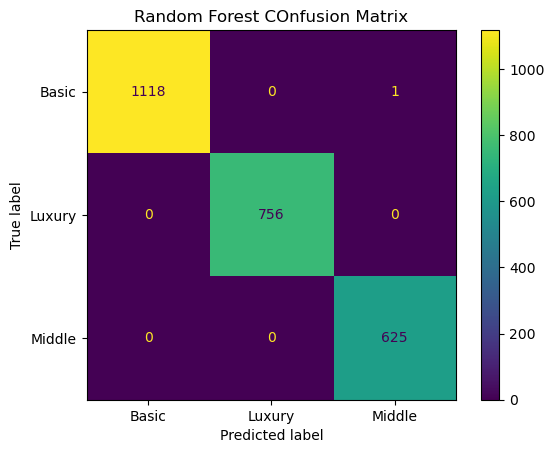

Classificaation report RF: 
               precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      1119
      Luxury       1.00      1.00      1.00       756
      Middle       1.00      1.00      1.00       625

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [27]:
print("cv score: {}".format(GSCV_RF.best_score_))
print("test score: {}".format(GSCV_RF.best_estimator_.score(x_test_enc, y_test)))
print("Best Model: {}", GSCV_RF.best_estimator_)

mask = GSCV_RF.best_estimator_.named_steps['feature select'].get_support()
print("Best feature: ", df_train_enc.columns[mask])

RF_pred = GSCV_RF.predict(x_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, RF_pred, labels=GSCV_RF.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_RF.classes_)
disp.plot()

plt.title("Random Forest COnfusion Matrix")
plt.show()

print("Classificaation report RF: \n", classification_report(y_test, RF_pred))



In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectPercentile, SelectKBest
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

pipe_LR = [
        ('data scaling', StandardScaler()),
        ('feature select', SelectKBest()),
        ('clf', LogisticRegression(random_state=93, class_weight='balanced', solver='liblinear'))]

params_grid_LR = [{
                'data scaling': [StandardScaler()],
                'feature select__k': np.arange(2,17),
                'clf__C': [0.1, 1, 10],
                'clf__max_iter': [100, 200]
            }, 
            {
                'data scaling': [MinMaxScaler()],
                'feature select__k': np.arange(2,17),
                'clf__C': [0.1, 1, 10],
                'clf__max_iter': [100, 200]
            }, 
            {
                'data scaling': [StandardScaler()],
                'feature select': [SelectPercentile()],
                'feature select__percentile': np.arange(20, 50),
                'clf__C': [0.1, 1, 10],
                'clf__max_iter': [100, 200]
            }, 
            {
                'data scaling': [MinMaxScaler()],
                'feature select': [SelectPercentile()],
                'feature select__percentile': np.arange(20, 50),
                'clf__C': [0.1, 1, 10],
                'clf__max_iter': [100, 200]}]

estimator_LR = Pipeline(pipe_LR)
GSCV_LR = GridSearchCV(estimator_LR, params_grid_LR, cv=SKF)

GSCV_LR.fit(x_train_enc, y_train)
print("GSCV Training Finished for Logistic Regression")

GSCV Training Finished for Logistic Regression


cv score: 0.8715999999999999
test score: 0.8792
Best Model: {} Pipeline(steps=[('data scaling', StandardScaler()),
                ('feature select', SelectKBest(k=8)),
                ('clf',
                 LogisticRegression(C=10, class_weight='balanced',
                                    random_state=93, solver='liblinear'))])
Best feature:  Index(['onehotencoder__hasyard_yes', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_old', 'remainder__squaremeters',
       'remainder__numberofrooms', 'remainder__citycode',
       'remainder__basement', 'remainder__garage'],
      dtype='object')


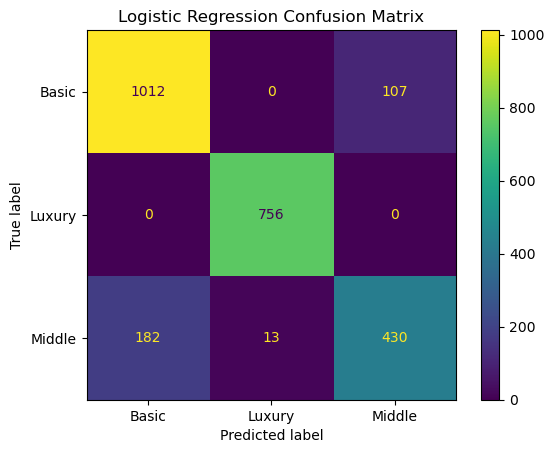

Classification report LR: 
               precision    recall  f1-score   support

       Basic       0.85      0.90      0.88      1119
      Luxury       0.98      1.00      0.99       756
      Middle       0.80      0.69      0.74       625

    accuracy                           0.88      2500
   macro avg       0.88      0.86      0.87      2500
weighted avg       0.88      0.88      0.88      2500



In [29]:
print("cv score: {}".format(GSCV_LR.best_score_))
print("test score: {}".format(GSCV_LR.best_estimator_.score(x_test_enc, y_test)))
print("Best Model: {}", GSCV_LR.best_estimator_)

mask = GSCV_LR.best_estimator_.named_steps['feature select'].get_support()
print("Best feature: ", df_train_enc.columns[mask])

LR_pred = GSCV_LR.predict(x_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, LR_pred, labels=GSCV_LR.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_LR.classes_)
disp.plot()

plt.title("Logistic Regression Confusion Matrix")
plt.show()

print("Classification report LR: \n", classification_report(y_test, LR_pred))


In [30]:
import pickle

with open('RF_Classification_model.pkl','wb') as r:
    pickle.dump((GSCV_RF),r)

print("Model RF berhasil disimpan")


Model RF berhasil disimpan
